# [Project 1] 자연어 처리를 통한 감정 분류

---

## 프로젝트 목표
- 자연어 데이터 셋을 분석하고 감정을 예측하는 분류 모델 수행
- 자연어 데이터를 전 처리하는 과정과 이에 따른 RNN 모델의 성능 변화를 학습

---

## 프로젝트 목차
1. **데이터 분석:** 자연어 데이터를 이루고 있는 요소에 대해서 Dataframe를 사용하여 분석 및 확인

2. **데이터 전 처리:** 자연어 데이터를 읽어오고 딥러닝 모델의 입력으로 전 처리

3. **딥러닝 모델:** RNN 모델을 구현하고 학습, 평가 및 예측을 수행

---

## 데이터 출처
-  https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp


### Acknowledgements

Thanks to Elvis - https://lnkd.in/eXJ8QVB & Hugging face team

The technique to prepare the dataset - https://www.aclweb.org/anthology/D18-1404/

---

## 프로젝트 개요

사람의 감정을 기계가 이해할 수 있을까요? 이러한 질문의 답을 찾기 위하여 자연어 처리 분야에서는 다양한 기술을 적용하며 발전해 왔습니다. 딥러닝 기술은 기존 기술이 가지고 있던 성능의 한계에서 새로운 돌파구를 제시하였으며 기존 머신러닝 기법보다 높은 성능을 보여주고 있습니다. 

위 물음에서 시작된 기술은 감정 분석 (Emotion analysis), 감성 분석 (Sentiment analysis) 이라는 분야로 다양한 분야에 활용되고 있습니다. 메타 데이터 속에서 텍스트 데이터의 감정 및 감성을 분류함은 데이터를 카테고리화하여 새로운 애플리케이션의 입력값으로 사용됩니다. 예를 들어, 긍부정 리뷰 분석 등은 해당 영화를 평가하는 데 있어서 관람객 수, 수익률 등과 함께 중요한 데이터로 사용될 수 있습니다. 또한 특정 감정의 데이터를 원하는 이용자에게 적절한 데이터를 제공할 수 있습니다. 예를 들어, 특정 글에서 분노한 감정 글 또는 욕설 등을 필터링하는데 사용할 수 있습니다. 

이번 프로젝트에서는 영어 문장 데이터에 해당하는 6개의 감정을 분류하는 딥러닝 모델을 구현합니다. 이를 통하여 감정 분석에 필요한 자연어 전 처리 과정을 학습하며, RNN 기반의 감정 분류용 딥러닝을 구현합니다. 아래 프로젝트 코드를 학습하고 학습자는 이를 활용하여 더욱 높은 성능을 보여주는 자신만의 모델을 구현합니다.  

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


---

In [2]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

## 1. 데이터 분석

### 1-1. 데이터 읽기

우선 데이터를 노트북 환경에서 사용하기 위하여 txt 파일로 주어진 데이터를 읽어 pandas의 dataframe으로 정리해 보겠습니다. 

txt 파일을 dataframe으로 읽기 전에, `train.txt`을 메모장으로 실행하게 되면 다음과 같습니다.

<img src="img/1-1.jpg" width="75%" height="75%" title="데이터" alt="데이터"></img>

위 그림과 같이 각 줄 별로 `자연어 데이터;감정` 데이터가 구성되어 있음을 알 수 있습니다.

이를 dataframe으로 정리하기 위해서 `;` 기호를 기준으로 왼쪽 자연어는 `Sentence` 열로, 오른쪽은 `Emotion` 열로 읽어봅시다.

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/train.txt', header =None, sep =';', names = ['Sentence','Emotion'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/test.txt', header = None, sep =';', names = ['Sentence','Emotion'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/MyDrive/sentimental_analysis_project/data/val.txt',header=None,sep=';',names=['Sentence','Emotion'],encoding='utf-8')

In [4]:
df_train.to_csv('/content/drive/MyDrive/sentimental_analysis_project/data/df_train.csv')

먼저 학습용 데이터부터 살펴봅시다.

아래는 dataframe으로 정리한 `train.txt` 정보 입니다.

In [4]:
df_train

,Sentence,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  16000 non-null  object
 1   Emotion   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


### 1-2. 데이터 시각화

#### Emotion 분포

데이터를 dataframe으로 저장했다면, 데이터가 어떻게 구성되어 있는지 그 분포와 특징을 알아봐야 합니다.

이를 보기 쉽게 표현하기 위해서 데이터 시각화를 수행합니다. 

우선 `Emotion` 의 분포부터 살펴봅시다.

In [6]:
df_train['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

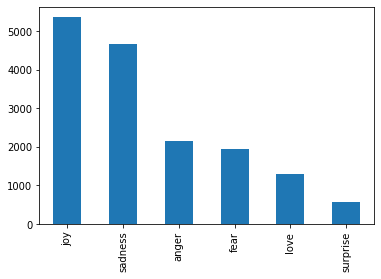

In [7]:
df_train['Emotion'].value_counts().plot(kind='bar')

`Sentiment`의 데이터는 총 6개의 감정으로 이루어져 있고 `joy`와 `sadness`를 제외한 4개의 감정은 적은 수를 가지고 있음을 알 수 있습니다.

특히 `surprise` 데이터의 경우, 전체 데이터의 10%도 안 되기에 불균형 데이터라 생각할 수 있습니다.

이러한 불균형 데이터의 경우, 학습 시, `surprise` 데이터를 잘 예측하지 못 하더라도 대다수를 차지하는 데이터를 잘 예측하게 되면 accuracy가 잘 나오는 맹점이 있습니다. 따라서 학습 후, 다양한 평가 방식을 통하여 이를 확인해야 하고, 불균형 데이터를 처리하는 기법을 사용하여 이를 완화해야 합니다.

#### Sentence 데이터 Word Cloud

이번엔 `Sentence` 데이터를 살펴 봅시다.

영어 문장으로 구성된 데이터이기에 다양한 시각화 및 분석 방식 중 Word Cloud를 사용하여 자주 나오는 단어를 살펴보겠습니다.

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

Word Cloud를 사용하기 위해서 nltk, wordcoloud, collections, re 라이브러리를 불러 옵니다.

Word Cloud는 문장에서 빈도수가 높은 단어를 출력하는데, 이를 위해선 직접 문장에서 단어를 뽑아내야 합니다.

우선 아래 코드와 같이 띄어쓰기를 기준으로 단어를 나눠 봅시다.

In [9]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train['Sentence'].str.lower().str.cat(sep=' ')) 

In [10]:
tokens

['i',
 'didnt',
 'feel',
 'humiliated',
 'i',
 'can',
 'go',
 'from',
 'feeling',
 'so',
 'hopeless',
 'to',
 'so',
 'damned',
 'hopeful',
 'just',
 'from',
 'being',
 'around',
 'someone',
 'who',
 'cares',
 'and',
 'is',
 'awake',
 'im',
 'grabbing',
 'a',
 'minute',
 'to',
 'post',
 'i',
 'feel',
 'greedy',
 'wrong',
 'i',
 'am',
 'ever',
 'feeling',
 'nostalgic',
 'about',
 'the',
 'fireplace',
 'i',
 'will',
 'know',
 'that',
 'it',
 'is',
 'still',
 'on',
 'the',
 'property',
 'i',
 'am',
 'feeling',
 'grouchy',
 'ive',
 'been',
 'feeling',
 'a',
 'little',
 'burdened',
 'lately',
 'wasnt',
 'sure',
 'why',
 'that',
 'was',
 'ive',
 'been',
 'taking',
 'or',
 'milligrams',
 'or',
 'times',
 'recommended',
 'amount',
 'and',
 'ive',
 'fallen',
 'asleep',
 'a',
 'lot',
 'faster',
 'but',
 'i',
 'also',
 'feel',
 'like',
 'so',
 'funny',
 'i',
 'feel',
 'as',
 'confused',
 'about',
 'life',
 'as',
 'a',
 'teenager',
 'or',
 'as',
 'jaded',
 'as',
 'a',
 'year',
 'old',
 'man',
 'i',

`i`, `you`, `and` 와 같이 자주 사용되지만 감정과는 상관없는 단어를 삭제하는 stopwords 처리과정을 수행합니다.

In [11]:
# nltk에서 지원하는 'stopwords'를 다운받습니다.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
en_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
# 영어 'stopwords'를 가져옵니다.
en_stops = set(stopwords.words('english'))

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['didnt',
 'feel',
 'humiliated',
 'go',
 'feeling',
 'hopeless',
 'damned',
 'hopeful',
 'around',
 'someone',
 'cares',
 'awake',
 'im',
 'grabbing',
 'minute',
 'post',
 'feel',
 'greedy',
 'wrong',
 'ever',
 'feeling',
 'nostalgic',
 'fireplace',
 'know',
 'still',
 'property',
 'feeling',
 'grouchy',
 'ive',
 'feeling',
 'little',
 'burdened',
 'lately',
 'wasnt',
 'sure',
 'ive',
 'taking',
 'milligrams',
 'times',
 'recommended',
 'amount',
 'ive',
 'fallen',
 'asleep',
 'lot',
 'faster',
 'also',
 'feel',
 'like',
 'funny',
 'feel',
 'confused',
 'life',
 'teenager',
 'jaded',
 'year',
 'old',
 'man',
 'petronas',
 'years',
 'feel',
 'petronas',
 'performed',
 'well',
 'made',
 'huge',
 'profit',
 'feel',
 'romantic',
 'feel',
 'like',
 'make',
 'suffering',
 'seeing',
 'mean',
 'something',
 'feel',
 'running',
 'divine',
 'experience',
 'expect',
 'type',
 'spiritual',
 'encounter',
 'think',
 'easiest',
 'time',
 'year',
 'feel',
 'dissatisfied',
 'feel',
 'low',
 'energy',


stopwords 처리를 수행한 단어가 주어졌다면 WordCloud 함수를 사용하여 출력합니다.

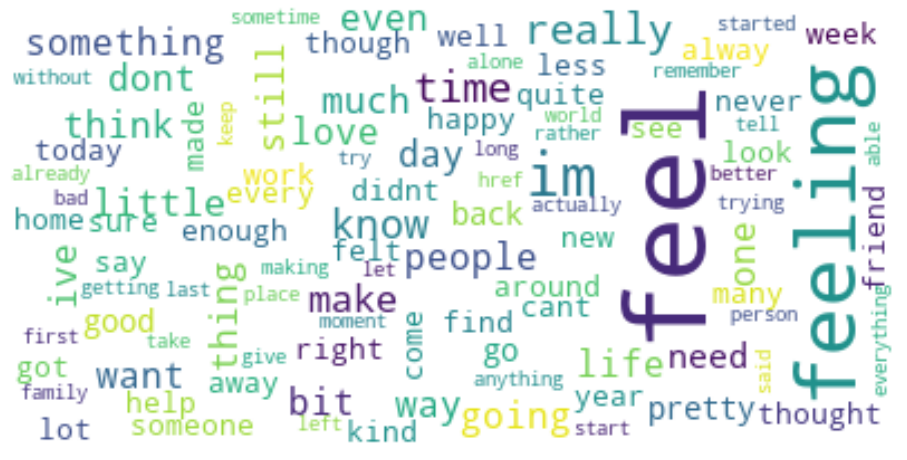

In [18]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
#text = list(set(filtered_sentence))
text = list(filtered_sentence)

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white", collocations=False).generate(' '.join(text))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
WordCloud().process_text(' '.join(text))

{'didnt': 123,
 'feel': 4808,
 'humiliated': 21,
 'go': 285,
 'feeling': 1631,
 'hopeless': 21,
 'damned': 4,
 'hopeful': 12,
 'around': 273,
 'someone': 254,
 'awake': 21,
 'im': 1052,
 'grabbing': 5,
 'minute': 59,
 'post': 123,
 'greedy': 37,
 'wrong': 63,
 'nostalgic': 27,
 'fireplace': 3,
 'know': 750,
 'still': 239,
 'property': 4,
 'grouchy': 27,
 'ive': 353,
 'little': 177,
 'burdened': 22,
 'lately': 98,
 'wasnt': 70,
 'sure': 126,
 'taking': 87,
 'milligrams': 1,
 'recommended': 1,
 'amount': 27,
 'fallen': 7,
 'asleep': 8,
 'lot': 236,
 'faster': 11,
 'funny': 47,
 'confused': 64,
 'life': 533,
 'teenager': 19,
 'jaded': 38,
 'year': 211,
 'old': 82,
 'man': 84,
 'petronas': 2,
 'performed': 2,
 'well': 267,
 'made': 152,
 'huge': 25,
 'profit': 5,
 'romantic': 47,
 'make': 421,
 'suffering': 40,
 'seeing': 60,
 'mean': 145,
 'something': 492,
 'running': 63,
 'divine': 37,
 'experience': 91,
 'expect': 34,
 'type': 42,
 'spiritual': 11,
 'encounter': 5,
 'think': 570,
 'eas

위 Word Cloud는 전체 데이터에 대한 결과이기에 각 감정 별 Word Cloud를 살펴보며 비교를 해봅시다. 

**joy**

dataframe에서 joy에 해당하는 데이터를 가져와 Word Cloud를 출력해봅니다.

In [19]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train[df_train['Emotion']=='joy']['Sentence'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['petronas',
 'years',
 'feel',
 'petronas',
 'performed',
 'well',
 'made',
 'huge',
 'profit',
 'feel',
 'running',
 'divine',
 'experience',
 'expect',
 'type',
 'spiritual',
 'encounter',
 'immense',
 'sympathy',
 'general',
 'point',
 'possible',
 'proto',
 'writer',
 'trying',
 'find',
 'time',
 'write',
 'corners',
 'life',
 'sign',
 'agent',
 'let',
 'alone',
 'publishing',
 'contract',
 'feels',
 'little',
 'precious',
 'feel',
 'reassured',
 'anxiety',
 'side',
 'feeling',
 'amused',
 'delighted',
 'able',
 'help',
 'chai',
 'lifeline',
 'support',
 'encouragement',
 'great',
 'feeling',
 'glad',
 'able',
 'help',
 'feel',
 'superior',
 'dead',
 'chicken',
 'grieving',
 'child',
 'get',
 'giddy',
 'feeling',
 'elegant',
 'perfectly',
 'fitted',
 'pencil',
 'skirt',
 'imagine',
 'real',
 'life',
 'scenario',
 'would',
 'emotionally',
 'connected',
 'enough',
 'someone',
 'feel',
 'totally',
 'accepted',
 'safe',
 'morally',
 'acceptable',
 'close',
 'prolonged',
 'physical',
 

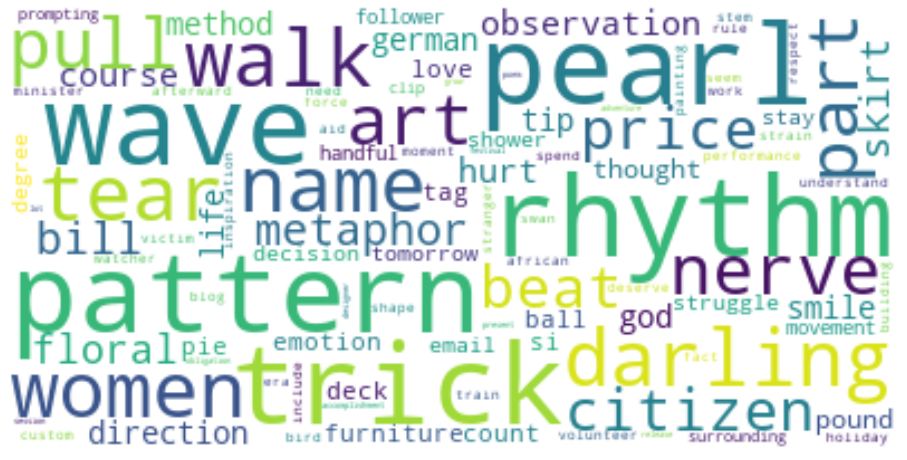

In [27]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
text = list(set(filtered_sentence))

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(text))


# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**sadness**

dataframe에서 sadness에 해당하는 데이터를 가져와 Word Cloud를 출력해봅니다.

In [33]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train[df_train['Emotion']=='sadness']['Sentence'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['didnt',
 'feel',
 'humiliated',
 'go',
 'feeling',
 'hopeless',
 'damned',
 'hopeful',
 'around',
 'someone',
 'cares',
 'awake',
 'ive',
 'feeling',
 'little',
 'burdened',
 'lately',
 'wasnt',
 'sure',
 'feel',
 'like',
 'make',
 'suffering',
 'seeing',
 'mean',
 'something',
 'feel',
 'low',
 'energy',
 'thirsty',
 'didnt',
 'really',
 'feel',
 'embarrassed',
 'feel',
 'pretty',
 'pathetic',
 'time',
 'started',
 'feeling',
 'sentimental',
 'dolls',
 'child',
 'began',
 'collection',
 'vintage',
 'barbie',
 'dolls',
 'sixties',
 'still',
 'love',
 'wish',
 'best',
 'longer',
 'tolerate',
 'effect',
 'bm',
 'lives',
 'fact',
 'turned',
 'bitter',
 'angry',
 'person',
 'always',
 'particularly',
 'kind',
 'people',
 'around',
 'feeling',
 'stressed',
 'feel',
 'inhibited',
 'someone',
 'elses',
 'kitchen',
 'like',
 'im',
 'painting',
 'someone',
 'elses',
 'picture',
 'become',
 'overwhelmed',
 'feel',
 'defeated',
 'feeling',
 'discouraged',
 'already',
 'robbing',
 'peter',
 'pay

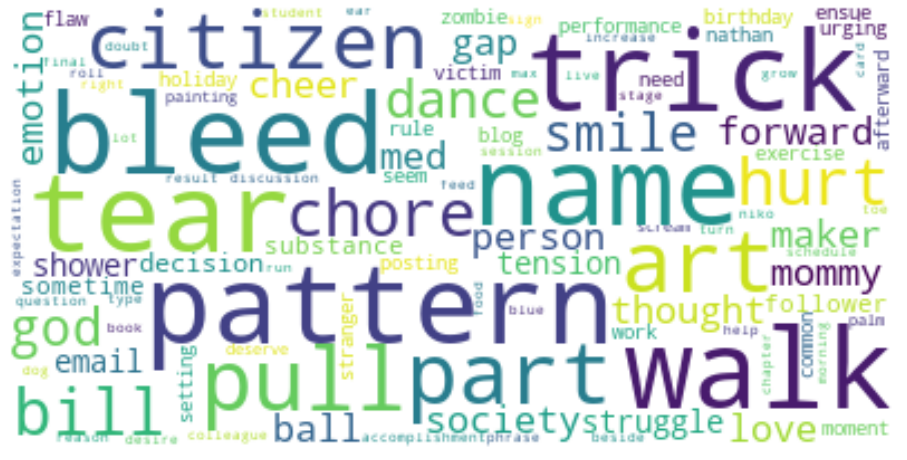

In [34]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
text = list(set(filtered_sentence))

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(text))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**anger**

dataframe에서 anger에 해당하는 데이터를 가져와 Word Cloud를 출력해봅니다.

In [35]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train[df_train['Emotion']=='anger']['Sentence'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['im',
 'grabbing',
 'minute',
 'post',
 'feel',
 'greedy',
 'wrong',
 'feeling',
 'grouchy',
 'think',
 'easiest',
 'time',
 'year',
 'feel',
 'dissatisfied',
 'feel',
 'irritated',
 'rejected',
 'without',
 'anyone',
 'anything',
 'saying',
 'anything',
 'already',
 'feel',
 'like',
 'fucked',
 'though',
 'dont',
 'usually',
 'eat',
 'morning',
 'feel',
 'kinda',
 'appalled',
 'feels',
 'like',
 'needs',
 'explain',
 'wide',
 'lenghth',
 'body',
 'measures',
 'etc',
 'pp',
 'climbed',
 'hill',
 'feeling',
 'frustrated',
 'id',
 'pretty',
 'much',
 'paced',
 'entirely',
 'wrong',
 'course',
 'factor',
 'never',
 'ever',
 'hampered',
 'made',
 'dent',
 'day',
 'feel',
 'bit',
 'rude',
 'writing',
 'elderly',
 'gentleman',
 'ask',
 'gifts',
 'feel',
 'bit',
 'greedy',
 'christmas',
 'mild',
 'greed',
 'stopped',
 'feeling',
 'cold',
 'began',
 'feeling',
 'hot',
 'feel',
 'selfish',
 'spoiled',
 'feel',
 'selfish',
 'read',
 'back',
 'former',
 'posts',
 'never',
 'asked',
 'prayers',
 

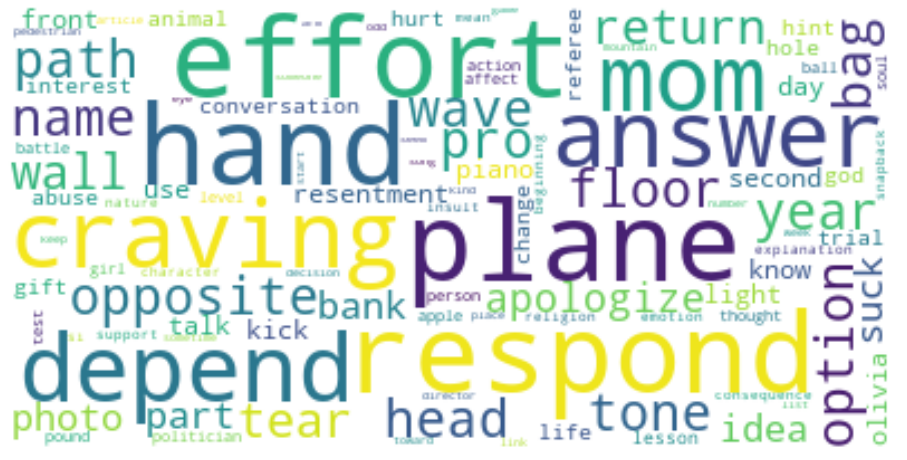

In [36]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
text = list(set(filtered_sentence))

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(text))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**fear**

dataframe에서 fear에 해당하는 데이터를 가져와 Word Cloud를 출력해봅니다.

In [37]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train[df_train['Emotion']=='fear']['Sentence'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['feel',
 'confused',
 'life',
 'teenager',
 'jaded',
 'year',
 'old',
 'man',
 'feel',
 'compromised',
 'skeptical',
 'value',
 'every',
 'unit',
 'work',
 'put',
 'feeling',
 'completely',
 'overwhelmed',
 'two',
 'strategies',
 'help',
 'feel',
 'grounded',
 'pour',
 'heart',
 'journal',
 'form',
 'letter',
 'god',
 'end',
 'list',
 'five',
 'things',
 'grateful',
 'remember',
 'feeling',
 'acutely',
 'distressed',
 'days',
 'stymied',
 'little',
 'bit',
 'wrote',
 'feeling',
 'unsure',
 'might',
 'go',
 'somewhere',
 'story',
 'unintended',
 'feel',
 'like',
 'pressured',
 'young',
 'beautiful',
 'thin',
 'depending',
 'trend',
 'girls',
 'rejuvenated',
 'butt',
 'implants',
 'began',
 'several',
 'times',
 'week',
 'feeling',
 'tortured',
 'hallucinations',
 'moving',
 'people',
 'figures',
 'sounds',
 'vibrations',
 'able',
 'lay',
 'bed',
 'dark',
 'feel',
 'terrified',
 'least',
 'begun',
 'feel',
 'apprehensive',
 'thick',
 'black',
 'rain',
 'clouds',
 'stormed',
 'sky',
 'to

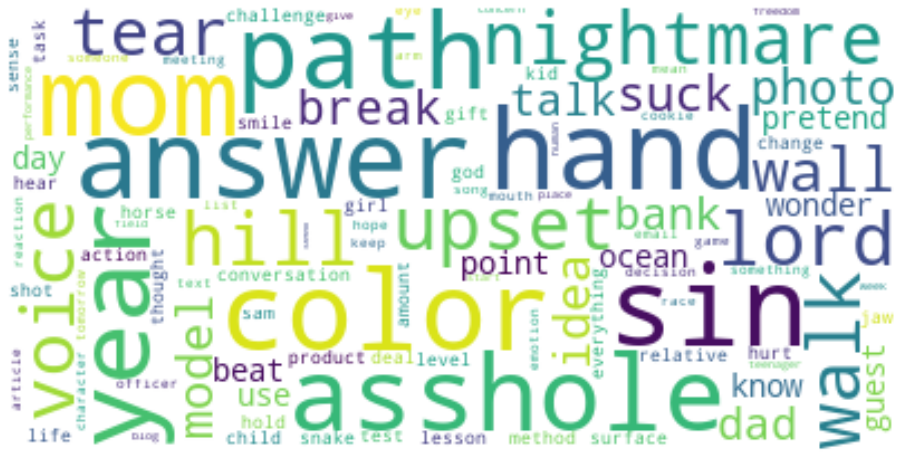

In [38]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
text = list(set(filtered_sentence))

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(text))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**love**

dataframe에서 love에 해당하는 데이터를 가져와 Word Cloud를 출력해봅니다.

In [39]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train[df_train['Emotion']=='love']['Sentence'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['ever',
 'feeling',
 'nostalgic',
 'fireplace',
 'know',
 'still',
 'property',
 'feel',
 'romantic',
 'let',
 'go',
 'sad',
 'feeling',
 'want',
 'accepted',
 'first',
 'home',
 'mine',
 'ate',
 'could',
 'feel',
 'gentle',
 'tingle',
 'throughout',
 'almost',
 'feeling',
 'healing',
 'taking',
 'place',
 'cellular',
 'level',
 'suppose',
 'truth',
 'needs',
 'shared',
 'havent',
 'feeling',
 'faithful',
 'lately',
 'ive',
 'dwelled',
 'doubt',
 'uncertainty',
 'faith',
 'ready',
 'meet',
 'mom',
 'airport',
 'feel',
 'ever',
 'supportive',
 'arms',
 'around',
 'talk',
 'dogs',
 'feel',
 'cannot',
 'understand',
 'words',
 'read',
 'emotions',
 'know',
 'supportive',
 'decided',
 'go',
 'home',
 'wont',
 'let',
 'child',
 'cry',
 'feel',
 'loving',
 'lily',
 'little',
 'going',
 'opportunities',
 'lasted',
 'short',
 'months',
 'feel',
 'like',
 'pains',
 'cannot',
 'imagine',
 'becoming',
 'passionate',
 'group',
 'idea',
 'causing',
 'pain',
 'excited',
 'finally',
 'meet',
 'compa

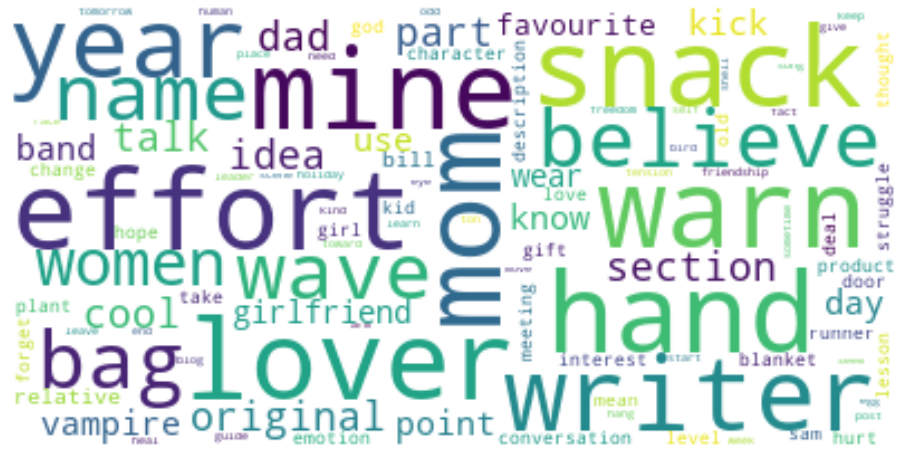

In [40]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
text = list(set(filtered_sentence))

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(text))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**surprise**

dataframe에서 love에 해당하는 데이터를 가져와 Word Cloud를 출력해봅니다.

In [41]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_train[df_train['Emotion']=='surprise']['Sentence'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['ive',
 'taking',
 'milligrams',
 'times',
 'recommended',
 'amount',
 'ive',
 'fallen',
 'asleep',
 'lot',
 'faster',
 'also',
 'feel',
 'like',
 'funny',
 'seen',
 'heard',
 'read',
 'past',
 'couple',
 'days',
 'left',
 'feeling',
 'impressed',
 'companies',
 'keep',
 'feeling',
 'pleasantly',
 'surprised',
 'supportiveness',
 'also',
 'ease',
 'new',
 'situations',
 'nearly',
 'finished',
 'week',
 'detox',
 'feel',
 'amazing',
 'feel',
 'stranger',
 'strange',
 'land',
 'raising',
 'son',
 'place',
 'father',
 'ancestral',
 'home',
 'started',
 'feeling',
 'funny',
 'friday',
 'woke',
 'sick',
 'dog',
 'im',
 'certainly',
 'going',
 'sit',
 'tell',
 'whats',
 'going',
 'personal',
 'life',
 'feel',
 'ever',
 'curious',
 'whats',
 'going',
 'life',
 'youd',
 'watch',
 'show',
 'im',
 'sorry',
 'wasnt',
 'humor',
 'post',
 'im',
 'feeling',
 'funny',
 'want',
 'hold',
 'feeling',
 'shocked',
 'awe',
 'wonder',
 'forever',
 'enclose',
 'verses',
 'could',
 'weigh',
 'much',
 'thinki

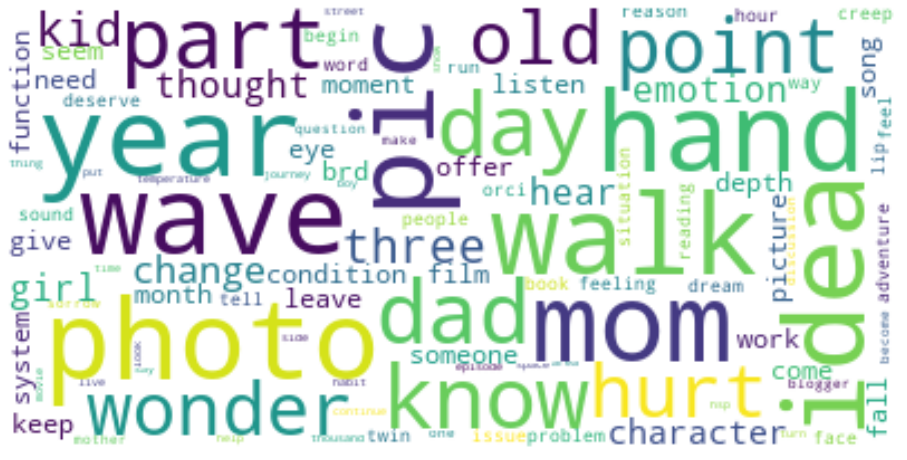

In [42]:
# stopword 처리된 토큰 데이터를 중복 없는 list로 저장합니다.
text = list(set(filtered_sentence))

# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(text))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#### val, test 데이터

dataframe으로 읽은 df_val, df_test 에 대해서 간단히 확인 해보겠습니다.

In [43]:
df_test

,Sentence,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2000 non-null   object
 1   Emotion   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [45]:
df_val

,Sentence,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [46]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2000 non-null   object
 1   Emotion   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


val, test 데이터는 각각 2000개의 데이터가 있음을 확인했습니다.

이번 프로젝트에서는 train 데이터를 학습하여 test 데이터를 분류하는 것이 목표이기에, train 데이터에 집중하여 분석만을 수행하고 val, test에 대한 분석은 넘어가도록 하겠습니다.

## 2. 데이터 전 처리

### 2-1. 토큰화

실질적으로 딥러닝 모델에서 자연어를 사용하기 위해서는 이를 위한 데이터 전 처리가 필요합니다. 

그 첫 단계로 문장 데이터를 단어 또는 글자 등의 단위로 쪼개는 토큰화 단계를 수행하겠습니다.

이를 수행하기 위해서 nltk에서 제공하는 `word_tokenize` 함수를 사용합니다.

In [20]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
# 분리된 토큰들이 저장될 list를 초기화 합니다.
token_sentence = []

for sentence in df_train['Sentence']:
    # word_tokenize 함수를 사용하여 문장을 토큰으로 분리합니다.
    word_token = word_tokenize(sentence)
    # 분리된 토큰들을 저장합니다.
    token_sentence.append(word_token)

토큰들이 저장되었다면 기존 df_train에 `token_sentence`를 추가하여 원 문장과 비교해 봅시다.

In [22]:
df_train['token_sentence'] = token_sentence
df_train

,Sentence,Emotion,token_sentence
0,i didnt feel humiliated,sadness,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,"[i, am, feeling, grouchy]"
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,"[i, just, had, a, very, brief, time, in, the, ..."
15996,i am now turning and i feel pathetic that i am...,sadness,"[i, am, now, turning, and, i, feel, pathetic, ..."
15997,i feel strong and good overall,joy,"[i, feel, strong, and, good, overall]"
15998,i feel like this was such a rude comment and i...,anger,"[i, feel, like, this, was, such, a, rude, comm..."


### 2-2. stop-words 제거

Word Cloud에서 수행했던 것과 마찬가지로 불 필요하다 판단되는 토큰인 stopwords를 제거합니다.

In [23]:
filtered_sentence = []
stop_words = set(stopwords.words('english'))

for sentence in df_train['token_sentence']:
    word_token = [word for word in sentence if not word in stop_words]
    filtered_sentence.append(word_token)

stopwords가 제거된 토큰들을 출력하면 다음과 같습니다.

In [24]:
filtered_sentence

[['didnt', 'feel', 'humiliated'],
 ['go',
  'feeling',
  'hopeless',
  'damned',
  'hopeful',
  'around',
  'someone',
  'cares',
  'awake'],
 ['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'],
 ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'],
 ['feeling', 'grouchy'],
 ['ive', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure'],
 ['ive',
  'taking',
  'milligrams',
  'times',
  'recommended',
  'amount',
  'ive',
  'fallen',
  'asleep',
  'lot',
  'faster',
  'also',
  'feel',
  'like',
  'funny'],
 ['feel', 'confused', 'life', 'teenager', 'jaded', 'year', 'old', 'man'],
 ['petronas',
  'years',
  'feel',
  'petronas',
  'performed',
  'well',
  'made',
  'huge',
  'profit'],
 ['feel', 'romantic'],
 ['feel', 'like', 'make', 'suffering', 'seeing', 'mean', 'something'],
 ['feel',
  'running',
  'divine',
  'experience',
  'expect',
  'type',
  'spiritual',
  'encounter'],
 ['think', 'easiest', 'time', 'year', 'feel', 'dissatisfied'],
 ['fe

### 2-3. 표준화

단어로 된 토큰의 경우, 아래와 같이 `먹는다`라는 핵심 의미가 있지만 다양한 형태의 동사로 표현됨을 알 수 있습니다. 

- eat
- eating
- ate
- eaten
- eats

표준화 기법 중 stemming 는 이러한 표현을 하나의 `먹는다`의 토큰으로 통일하여 그 뜻에 집중할 수 있도록 합니다. 문장을 만들어야 하는 모델의 경우, 과거형, 미래형 등의 표현이 중요할 수 있지만 감정 분류의 경우 원초적인 그 뜻에 집중하는 것이 성능을 향상 시킬 수 있을 것 입니다.

In [25]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [26]:
stemming_sentence = []

for sentence in filtered_sentence:
    
    word_token = [stemmer.stem(word) for word in sentence]
    stemming_sentence.append(word_token)

In [83]:
stemming_sentence

[['didnt', 'feel', 'humili'],
 ['go',
  'feel',
  'hopeless',
  'damn',
  'hope',
  'around',
  'someon',
  'care',
  'awak'],
 ['im', 'grab', 'minut', 'post', 'feel', 'greedi', 'wrong'],
 ['ever', 'feel', 'nostalg', 'fireplac', 'know', 'still', 'properti'],
 ['feel', 'grouchi'],
 ['ive', 'feel', 'littl', 'burden', 'late', 'wasnt', 'sure'],
 ['ive',
  'take',
  'milligram',
  'time',
  'recommend',
  'amount',
  'ive',
  'fallen',
  'asleep',
  'lot',
  'faster',
  'also',
  'feel',
  'like',
  'funni'],
 ['feel', 'confus', 'life', 'teenag', 'jade', 'year', 'old', 'man'],
 ['petrona',
  'year',
  'feel',
  'petrona',
  'perform',
  'well',
  'made',
  'huge',
  'profit'],
 ['feel', 'romant'],
 ['feel', 'like', 'make', 'suffer', 'see', 'mean', 'someth'],
 ['feel', 'run', 'divin', 'experi', 'expect', 'type', 'spiritu', 'encount'],
 ['think', 'easiest', 'time', 'year', 'feel', 'dissatisfi'],
 ['feel', 'low', 'energi', 'thirsti'],
 ['immens',
  'sympathi',
  'gener',
  'point',
  'possibl'

### 2-4. BoW

토큰이 생성되었다면, 단어 사전격인 BoW 생성하여 토큰 별 인덱스를 지정합니다.

In [27]:
from  keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(stemming_sentence)

In [28]:
print(len(tokenizer.word_index))
tokenizer.word_index

10376


{'UNK': 1,
 'feel': 2,
 'like': 3,
 'im': 4,
 'get': 5,
 'time': 6,
 'realli': 7,
 'know': 8,
 'make': 9,
 'go': 10,
 'want': 11,
 'love': 12,
 'littl': 13,
 'think': 14,
 'day': 15,
 'thing': 16,
 'peopl': 17,
 'one': 18,
 'would': 19,
 'even': 20,
 'still': 21,
 'ive': 22,
 'life': 23,
 'way': 24,
 'need': 25,
 'bit': 26,
 'someth': 27,
 'much': 28,
 'dont': 29,
 'work': 30,
 'could': 31,
 'say': 32,
 'start': 33,
 'look': 34,
 'see': 35,
 'back': 36,
 'tri': 37,
 'good': 38,
 'pretti': 39,
 'right': 40,
 'alway': 41,
 'come': 42,
 'help': 43,
 'friend': 44,
 'also': 45,
 'year': 46,
 'today': 47,
 'use': 48,
 'take': 49,
 'around': 50,
 'person': 51,
 'cant': 52,
 'made': 53,
 'hate': 54,
 'well': 55,
 'got': 56,
 'though': 57,
 'happi': 58,
 'didnt': 59,
 'write': 60,
 'live': 61,
 'felt': 62,
 'lot': 63,
 'never': 64,
 'thought': 65,
 'hope': 66,
 'someon': 67,
 'find': 68,
 'everi': 69,
 'quit': 70,
 'read': 71,
 'less': 72,
 'sure': 73,
 'enough': 74,
 'week': 75,
 'give': 76,
 

### 2-5. padding

딥러닝의 입력값은 단어를 입력으로 받지 않기에 BoW로 정리된 단어 인덱스를 사용하여, 토큰화된 문장의 토큰을 인덱스로 변환합니다.

In [29]:
X_train=tokenizer.texts_to_sequences(stemming_sentence)
X_train

[[59, 2, 581],
 [10, 2, 383, 740, 66, 50, 67, 95, 1112],
 [4, 1304, 429, 106, 2, 421, 178],
 [83, 2, 582, 3301, 8, 21, 2850],
 [2, 933],
 [22, 2, 13, 330, 169, 257, 73],
 [22, 49, 5361, 6, 1305, 752, 22, 2099, 1214, 63, 1624, 45, 2, 3, 393],
 [2, 337, 23, 1023, 655, 46, 184, 307],
 [3975, 46, 2, 3975, 860, 55, 53, 894, 2524],
 [2, 566],
 [2, 3, 9, 400, 35, 124, 27],
 [2, 134, 446, 248, 301, 490, 1175, 1957],
 [14, 3976, 6, 46, 2, 530],
 [2, 264, 373, 3302],
 [1833,
  1416,
  105,
  153,
  293,
  5362,
  962,
  37,
  68,
  6,
  60,
  1417,
  23,
  1113,
  2851,
  90,
  119,
  1356,
  1547,
  2,
  13,
  430],
 [2, 720, 895, 352],
 [59, 7, 2, 363],
 [2, 39, 531, 6],
 [33, 2, 776, 2100, 302, 491, 1176, 1834, 3303, 2100, 3977],
 [2, 2101, 790, 331, 69, 2297, 30, 109],
 [2, 155, 384, 92, 165, 84, 32, 84],
 [2,
  139,
  149,
  146,
  1958,
  43,
  2,
  767,
  1835,
  129,
  1264,
  1143,
  934,
  141,
  102,
  515,
  935,
  16,
  613],
 [2, 768, 741],
 [115, 43, 5363, 3978, 81, 1215, 227, 2, 

인덱스로 변환된 문장의 길이는 제각각으로 이루어져 있습니다.

딥러닝의 입력값으로는 고정된 크기를 받기에 padding 기법을 사용합니다.

padding 할 최대 길이를 구하기 위하여 우선 문장의 길이 분포를 출력해 봅니다.

35


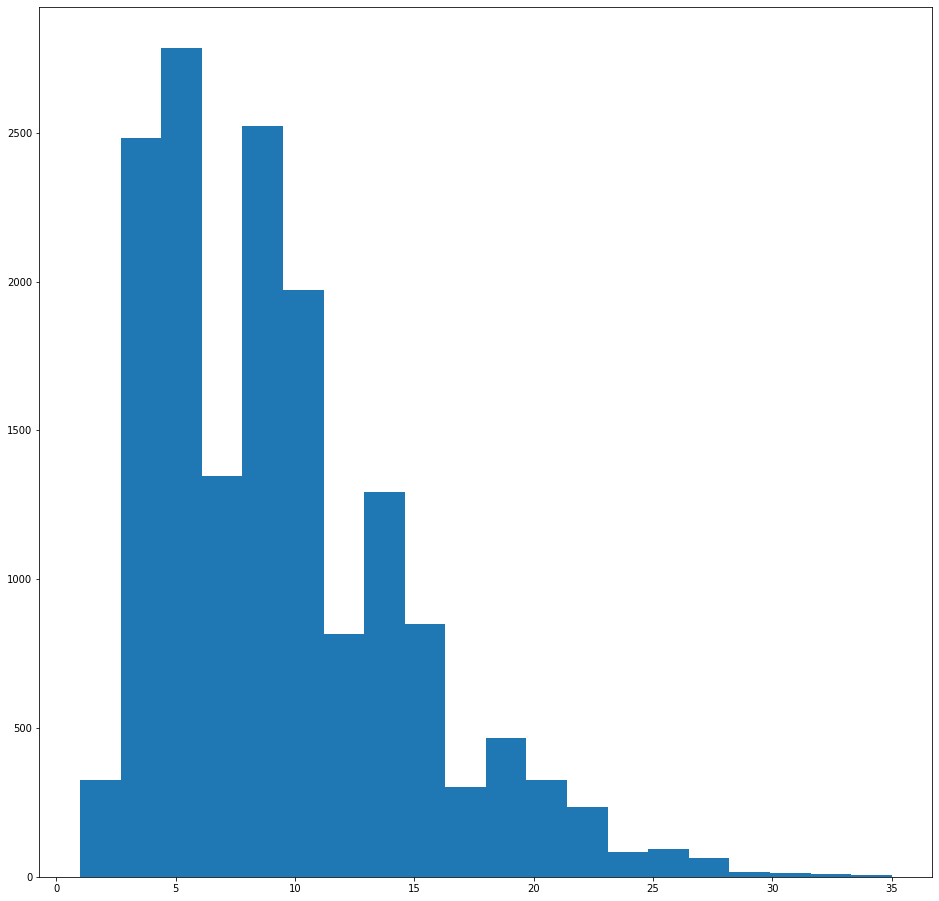

In [30]:
import matplotlib.pyplot as plt

num_token_per_sentence = [ len(sentence) for sentence in X_train ]
print(max(num_token_per_sentence))

plt.hist(num_token_per_sentence, bins=20)
plt.show()

대부분의 문장 길이는 20개 안쪽으로 분포하고 있고, 최대 35개인 것을 알 수 있습니다.

문장 길이의 이상값으로 생각될 어마어마 큰 값이 존재하지 않고 35개는 딥러닝 성능에 큰 무리를 주지 않기에 35개를 최대 길이로 잡고 패딩을 수행합니다.

In [31]:
X_train_pad=pad_sequences(X_train,maxlen=35,padding='post')
X_train_pad

array([[  59,    2,  581, ...,    0,    0,    0],
       [  10,    2,  383, ...,    0,    0,    0],
       [   4, 1304,  429, ...,    0,    0,    0],
       ...,
       [   2,  256,   38, ...,    0,    0,    0],
       [   2,    3,  473, ...,    0,    0,    0],
       [   8,   63,    2, ...,    0,    0,    0]], dtype=int32)

### 2-6. label 데이터 변환

감정 단어로 이루어진 label 데이터 또한 딥러닝의 학습 데이터로 사용하기 위하여 숫자형 데이터로 변환해야 합니다.

`'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5` 방식으로 맵핑하여 변환을 수행합니다.

In [32]:
df_train['Emotion']=df_train['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_train['Emotion']

0        3
1        3
2        1
3        2
4        1
        ..
15995    3
15996    3
15997    0
15998    1
15999    3
Name: Emotion, Length: 16000, dtype: int64

In [33]:
df_train

,Sentence,Emotion,token_sentence
0,i didnt feel humiliated,3,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,3,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,1,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,2,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,1,"[i, am, feeling, grouchy]"
...,...,...,...
15995,i just had a very brief time in the beanbag an...,3,"[i, just, had, a, very, brief, time, in, the, ..."
15996,i am now turning and i feel pathetic that i am...,3,"[i, am, now, turning, and, i, feel, pathetic, ..."
15997,i feel strong and good overall,0,"[i, feel, strong, and, good, overall]"
15998,i feel like this was such a rude comment and i...,1,"[i, feel, like, this, was, such, a, rude, comm..."


In [34]:
y_train = np.array(df_train['Emotion'].values)
y_train

array([3, 3, 1, ..., 0, 1, 3])

### 2-7. val, test 데이터

train 데이터 전 처리 방식과 같은 방식으로 val, test 데이터를 전 처리 합니다.

In [35]:
stemming_sentence_val = []
stemming_sentence_test = []

for sentence in df_val['Sentence']:
    word_token = word_tokenize(sentence)
    word_token = [stemmer.stem(word) for word in word_token if not word in stop_words]
    
    stemming_sentence_val.append(word_token)
    
for sentence in df_test['Sentence']:
    word_token = word_tokenize(sentence)
    word_token = [stemmer.stem(word) for word in word_token if not word in stop_words]
    
    stemming_sentence_test.append(word_token)

X_val=tokenizer.texts_to_sequences(stemming_sentence_val)
X_test=tokenizer.texts_to_sequences(stemming_sentence_test)

X_val_pad=pad_sequences(X_val,maxlen=35,padding='pre')
X_test_pad=pad_sequences(X_test,maxlen=35,padding='pre')

df_val['Emotion']=df_val['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test['Emotion']=df_test['Emotion'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

y_val = np.array(df_val['Emotion'].values)
y_test = np.array(df_test['Emotion'].values)

## 3. 딥러닝 모델

### 3-1. 모델 설정

감정 분류를 위한 딥러닝 모델로 LSTM을 사용하여 2개의 layer를 쌓고 6개를 출력을 갖는 softmax 층으로 구성합니다.

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [37]:
tokenizer.word_index

{'UNK': 1,
 'feel': 2,
 'like': 3,
 'im': 4,
 'get': 5,
 'time': 6,
 'realli': 7,
 'know': 8,
 'make': 9,
 'go': 10,
 'want': 11,
 'love': 12,
 'littl': 13,
 'think': 14,
 'day': 15,
 'thing': 16,
 'peopl': 17,
 'one': 18,
 'would': 19,
 'even': 20,
 'still': 21,
 'ive': 22,
 'life': 23,
 'way': 24,
 'need': 25,
 'bit': 26,
 'someth': 27,
 'much': 28,
 'dont': 29,
 'work': 30,
 'could': 31,
 'say': 32,
 'start': 33,
 'look': 34,
 'see': 35,
 'back': 36,
 'tri': 37,
 'good': 38,
 'pretti': 39,
 'right': 40,
 'alway': 41,
 'come': 42,
 'help': 43,
 'friend': 44,
 'also': 45,
 'year': 46,
 'today': 47,
 'use': 48,
 'take': 49,
 'around': 50,
 'person': 51,
 'cant': 52,
 'made': 53,
 'hate': 54,
 'well': 55,
 'got': 56,
 'though': 57,
 'happi': 58,
 'didnt': 59,
 'write': 60,
 'live': 61,
 'felt': 62,
 'lot': 63,
 'never': 64,
 'thought': 65,
 'hope': 66,
 'someon': 67,
 'find': 68,
 'everi': 69,
 'quit': 70,
 'read': 71,
 'less': 72,
 'sure': 73,
 'enough': 74,
 'week': 75,
 'give': 76,
 

In [38]:
sequence_length = 35 # max(num_token_per_sentence)
vocabulary_size = len(tokenizer.word_index)+1 # 10376
embedding_dim = 256

In [40]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=sequence_length, mask_zero=True))
model.add(Dropout(0.25))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 256)           2656512   
_________________________________________________________________
dropout (Dropout)            (None, 35, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 35, 50)            61400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 6)                 606       
Total params: 2,778,918
Trainable params: 2,778,918
Non-trainable params: 0
_________________________________________________________________
None


optimizer는 adam으로, loss는 6개 분류 이기에 sparse_categorical_crossentropy 으로 설정합니다.

In [41]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### 3-2. 학습 수행

epochs는 10, batch_size는 64로 설정하고 train, val 데이터를 사용하여 학습을 수행합니다. 

In [42]:
history = model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=10, batch_size=64)

Epoch 1/10
250/250 [==============================] - 21s 44ms/step - loss: 1.3949 - accuracy: 0.4499 - val_loss: 0.5092 - val_accuracy: 0.8185
Epoch 2/10
250/250 [==============================] - 9s 35ms/step - loss: 0.3166 - accuracy: 0.8925 - val_loss: 0.3482 - val_accuracy: 0.8815
Epoch 3/10
250/250 [==============================] - 9s 35ms/step - loss: 0.1680 - accuracy: 0.9420 - val_loss: 0.3404 - val_accuracy: 0.8880
Epoch 4/10
250/250 [==============================] - 9s 35ms/step - loss: 0.1159 - accuracy: 0.9570 - val_loss: 0.3658 - val_accuracy: 0.8850
Epoch 5/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0826 - accuracy: 0.9709 - val_loss: 0.3667 - val_accuracy: 0.8815
Epoch 6/10
250/250 [==============================] - 9s 36ms/step - loss: 0.0677 - accuracy: 0.9747 - val_loss: 0.4060 - val_accuracy: 0.8865
Epoch 7/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0536 - accuracy: 0.9802 - val_loss: 0.4130 - val_accuracy: 0.892

학습 결과를 출력하면 다음과 같습니다.

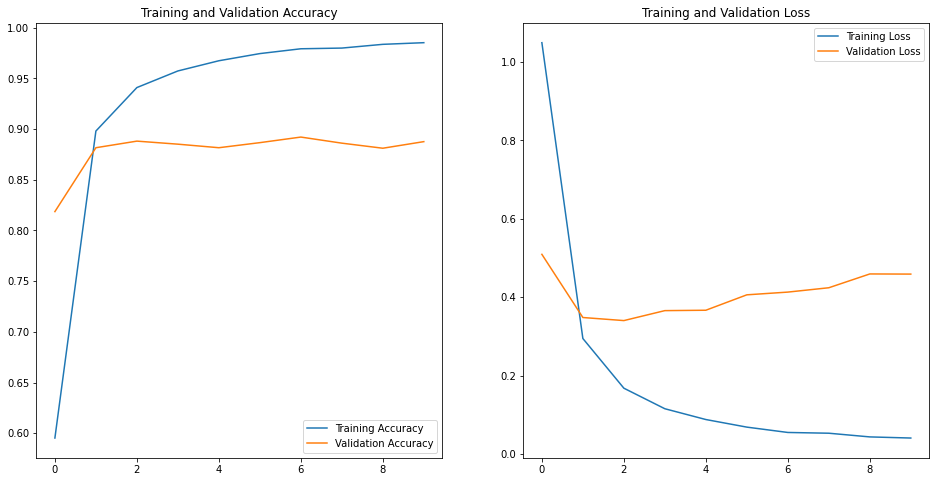

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 3-3. 평가 및 예측

학습된 결과를 바탕으로 test 데이터에서의 성능을 살펴봅시다.

In [39]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

print('test set accuracy: ', test_accuracy)

NameError: ignored

test 데이터의 예측된 감정을 `test_prediction`에 저장하고 5개의 샘플을 출력해봅시다.

In [44]:
test_prediction = model.predict_classes(X_test_pad)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_prediction

array([3, 3, 3, ..., 0, 0, 4])

In [103]:
# 0번부터 4번까지 5개를 출력해보겠습니다.
for i in range(5): 
    
    # 사용하였습니다.
    test_prediction
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, df_test['Sentence'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, test_prediction[i], df_test['Emotion'][i]))

0 번째 테스트 데이터 문장: 
im feeling rather rotten so im not very ambitious right now
0 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

1 번째 테스트 데이터 문장: 
im updating my blog because i feel shitty
1 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

2 번째 테스트 데이터 문장: 
i never make her separate from me because i don t ever want her to feel like i m ashamed with her
2 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3

3 번째 테스트 데이터 문장: 
i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
3 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

4 번째 테스트 데이터 문장: 
i was feeling a little vain when i did this one
4 번째 테스트 데이터의 예측 결과: 3, 실제 데이터: 3



마지막으로 confusion matrix를 사용하여 accuracy에서 알 수 없었던 오분류 정보에 대해서 살펴봅니다.

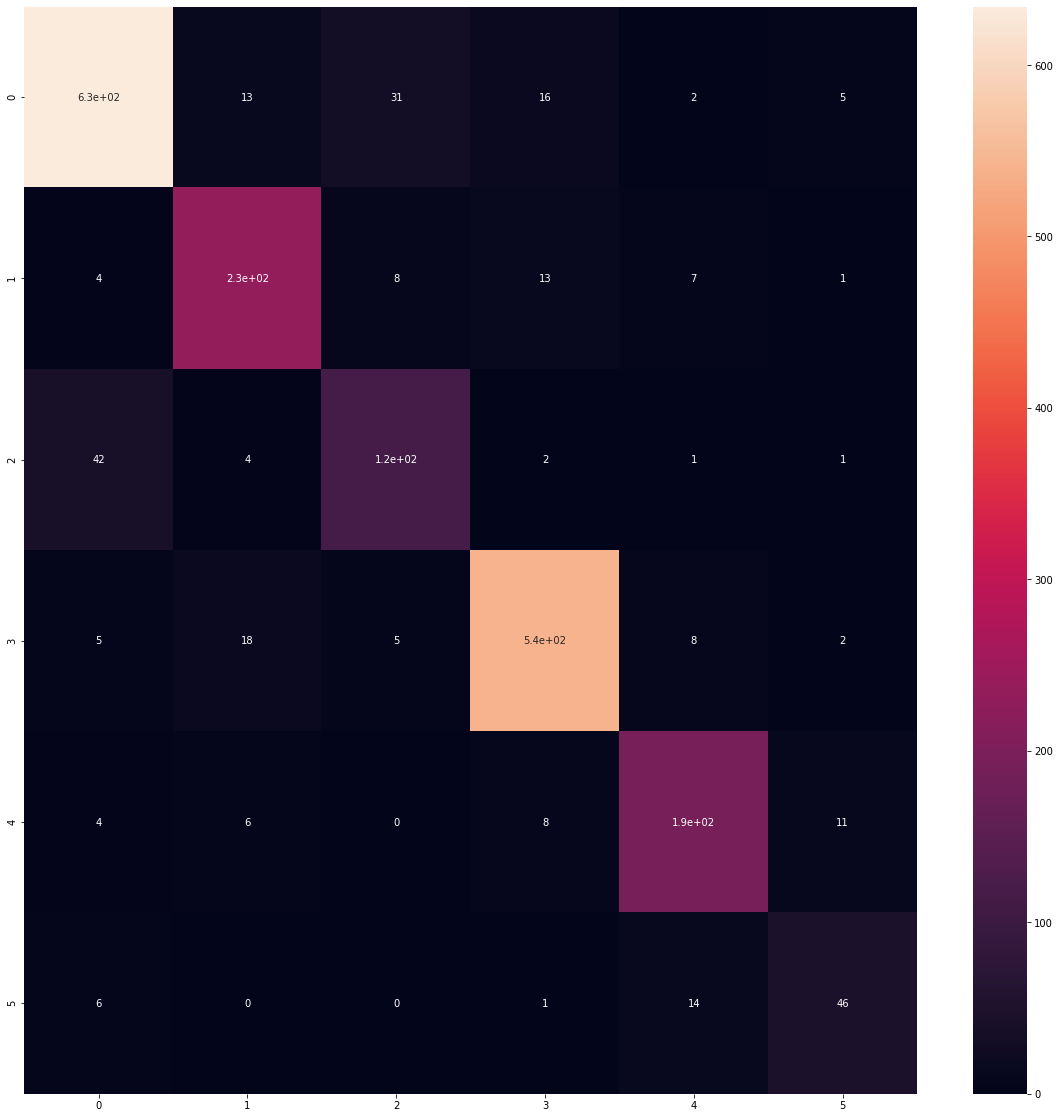

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_prediction, y_test)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

In [45]:
df_test['prediction'] = test_prediction

In [46]:
df_test

,Sentence,Emotion,prediction
0,im feeling rather rotten so im not very ambiti...,3,3
1,im updating my blog because i feel shitty,3,3
2,i never make her separate from me because i do...,3,3
3,i left with my bouquet of red and yellow tulip...,0,0
4,i was feeling a little vain when i did this one,3,3
...,...,...,...
1995,i just keep feeling like someone is being unki...,1,1
1996,im feeling a little cranky negative after this...,1,1
1997,i feel that i am useful to my people and that ...,0,0
1998,im feeling more comfortable with derby i feel ...,0,0


'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5

In [126]:
for idx, row in  df_test[(df_test['prediction'] == 2) & (df_test['Emotion'] == 0)].iterrows():
  print(row['Sentence'])

i feel very honoured to be included in a magzine which prioritises health and clean living so highly im curious do any of you read magazines concerned with health and clean lifestyles such as the green parent
i feel like i am in paradise kissing those sweet lips make me feel like i dive into a magical world of love
i realized what i am passionate about helping women feel accepted and appreciated
i could feel his breath on me and smell the sweet scent of him
i suppose if one was feeling generous one could say i was stressed by the elevator ride
i believe that people should choose the causes they feel passionate about and do what they can and i have no right or desire to push my own charities as more worthy than another
i never feel like im not supporting
i feel like alcoholism is something that is widely accepted as the norm in gay culture
i also feel i have accepted my dark side and am finally realizing what of my dark side is healthy
i feel so blessed to be able to share it with you a

## 제출

프로젝트에서 수행한 모델을 수정하여 `score.scv` 데이터에 대한 정확도가 92% 이상이 나오도록 구현해봅시다.

`score.csv` 감정 label 없이 Sentence만 존재하는 데이터로 구성되어 있습니다.

이 데이터를 사용하여 예측한 결과를 dataframe으로 구성하고 submission.csv로 저장하여 제출합니다.

### 지시사항

1. score.csv 파일 안에 있는 이미지 파일들의 label을 예측하여 accuracy가 92% 이상이 나오도록 합니다.
   - score.csv와 같은 순서로 정렬된 index와 그에 대한 label을 'Emotion' 열로 갖는 dataframe이 되도록 합니다. 
   - 생성한 dataframe을 아래 채점 코드를 실행하여 submission.csv으로 저장합니다. (아래 예시 참고)

### 예시)  
score 데이터셋이 아래와 같다면,

In [ ]:
df_test_feature = pd.read_csv("score.csv")
df_test_feature.head()

FileNotFoundError: ignored

아래와 같은 결과를 만들고 csv 파일로 저장합니다.

| index | Emotion |
|-------|--------|
| 0     | 5  |
| 1     | 1 |
| 2     | 2 |
| 3     | 1 |
| 4     | 0 |

### 채점

결과 csv 파일을 저장 후, 아래 코드를 실행하면 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [ ]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>